 Load and Explore the Dataset

In [2]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv("pharmaceutical_work_package_data.csv")

# Preview the data
print(dataset.head())
print(dataset.info())
print(dataset.describe())

    task_type  resources  duration  cost
0     Testing          3        26   679
1  Validation          4        24  1296
2    Analysis          7        37  4313
3     Testing          3        12  2524
4     Testing          9        29  3717
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   task_type  5000 non-null   object
 1   resources  5000 non-null   int64 
 2   duration   5000 non-null   int64 
 3   cost       5000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 156.4+ KB
None
         resources     duration         cost
count  5000.000000  5000.000000  5000.000000
mean      4.999400    26.984800  2712.363600
std       2.583473    12.888855  1286.940192
min       1.000000     5.000000   500.000000
25%       3.000000    16.000000  1627.000000
50%       5.000000    27.000000  2666.000000
75%       7.000000    38.000000  3807.0000

Preprocess the Data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode the 'task_type' column
dataset = pd.get_dummies(dataset, columns=["task_type"], drop_first=True)

# Define features and target
X = dataset.drop("cost", axis=1)  # Features (resources, duration, task_type)
y = dataset["cost"]  # Target (cost)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Machine Learning Model

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train the model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 1286.1051876022661
Mean Squared Error: 2331069.3371883486


Saving the Model and Use It for Predictions

In [5]:
import joblib

# Save the model
joblib.dump(model, "cost_estimation_model.pkl")
print("Model saved as 'cost_estimation_model.pkl'.")

# Load the model (if needed)
loaded_model = joblib.load("cost_estimation_model.pkl")

# Example new input for prediction
new_data = pd.DataFrame({
    "resources": [5],
    "duration": [20],
    "task_type_Development": [1],
    "task_type_Testing": [0],
    "task_type_Validation": [0]
})

# Scale new data
new_data_scaled = scaler.transform(new_data)

# Predict cost
predicted_cost = loaded_model.predict(new_data_scaled)
print(f"Predicted Cost: {predicted_cost[0]}")

Model saved as 'cost_estimation_model.pkl'.
Predicted Cost: 2652.0952142857136


Generate Report

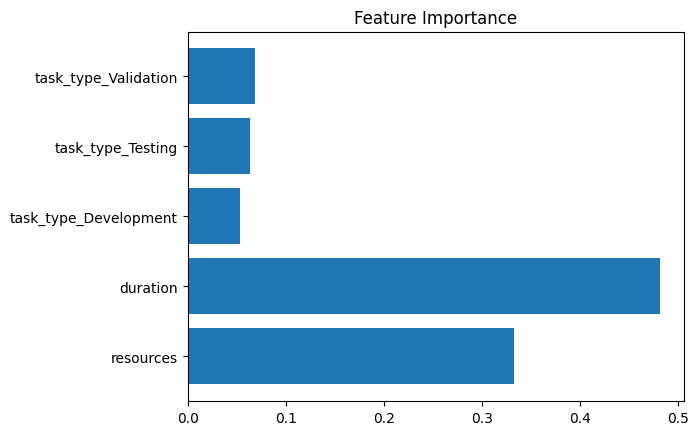

In [6]:
import matplotlib.pyplot as plt

# Feature importance visualization
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.show()

Model Evaluation

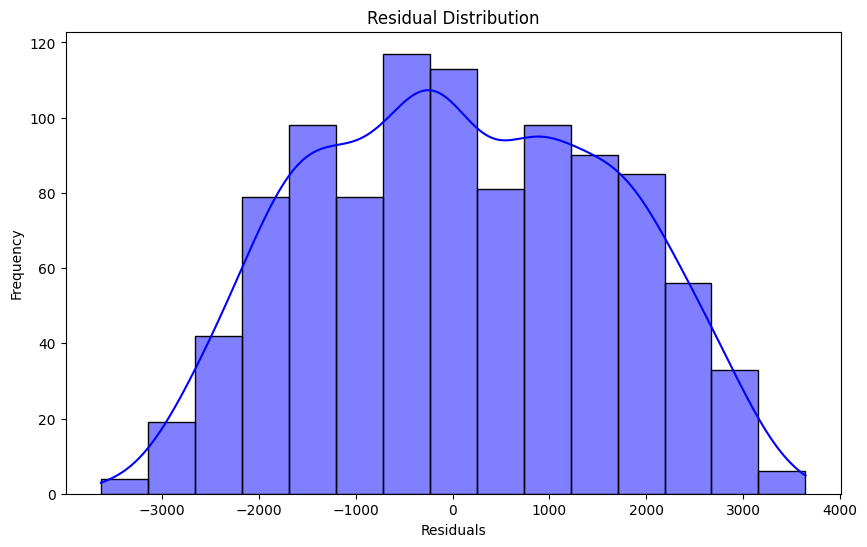

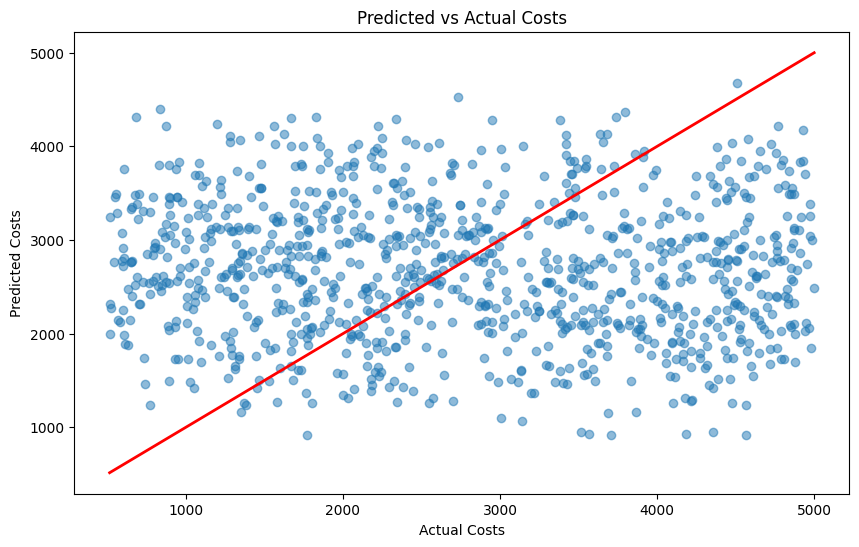

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of predictions vs actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.title("Predicted vs Actual Costs")
plt.xlabel("Actual Costs")
plt.ylabel("Predicted Costs")
plt.show()

Error Metrics for Detailed Evaluation

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

# Additional Metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {mse**0.5:.2f}")

R^2 Score: -0.41
Mean Absolute Error: 1286.11
Mean Squared Error: 2331069.34
Root Mean Squared Error: 1526.78


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearch
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train final model with best parameters
optimized_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END m

Feature Analysis

In [ ]:
importances = optimized_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, color="blue")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Generate Business Insights

Resource Allocation Efficiency:

In [ ]:
avg_cost_per_resource = dataset.groupby("resources")["cost"].mean()

plt.figure(figsize=(10, 6))
avg_cost_per_resource.plot(kind="bar", color="green")
plt.title("Average Cost per Resource Allocation")
plt.xlabel("Number of Resources")
plt.ylabel("Average Cost (USD)")
plt.show()

Real-Time Predictions

In [13]:
def predict_cost(resources, duration, task_type):
    # Encode task type
    task_type_encoded = {
        "Development": [1, 0, 0],
        "Testing": [0, 1, 0],
        "Validation": [0, 0, 1],
        "Analysis": [0, 0, 0]
    }
    encoded_task_type = task_type_encoded.get(task_type, [0, 0, 0])

    # Create input DataFrame
    input_data = pd.DataFrame({
        "resources": [resources],
        "duration": [duration],
        "task_type_Development": [encoded_task_type[0]],
        "task_type_Testing": [encoded_task_type[1]],
        "task_type_Validation": [encoded_task_type[2]]
    })

    # Scale the data
    scaled_data = scaler.transform(input_data)

    # Predict cost
    prediction = optimized_model.predict(scaled_data)
    return prediction[0]

# Example usage
resources = 6
duration = 25
task_type = "Development"
predicted_cost = predict_cost(resources, duration, task_type)
print(f"Predicted Cost for {task_type}: ${predicted_cost:.2f}")

Predicted Cost for Development: $3190.48


Deploy the model using tools like Flask

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    resources = data['resources']
    duration = data['duration']
    task_type = data['task_type']
    prediction = predict_cost(resources, duration, task_type)
    return jsonify({"predicted_cost": prediction})

if __name__ == "__main__":
    app.run(debug=True)